In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('math.csv')
df = df[df['dynamic'] == False]
df.drop(['dynamic'], axis=1, inplace=True)

real_max = df['runtime'] * df['threads']
user_pct = df['usertime'] / real_max
user_pct = user_pct.clip(upper=1.0)
df['usertime'] /= df['threads']
df['user-pct'] = user_pct

df['energy-user'] = df['user-pct'] * df['energy']

df['W'] = df['energy'] / df['runtime']

df0 = df[df['busy'] == 0]

df

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,7.201206,0.059153,0.059165,1.000000,7.201206,121.739298
1,0,2,3.432752,0.029399,0.029102,0.989902,3.398088,116.762897
2,0,3,3.737186,0.029368,0.019441,0.661965,2.473887,127.253380
3,0,4,2.291222,0.014902,0.014714,0.987394,2.262339,153.752656
4,0,5,1.717868,0.011860,0.011685,0.985199,1.692443,144.841886
...,...,...,...,...,...,...,...,...
283,32,28,3.329825,0.013931,0.002330,0.167240,0.556880,239.026424
284,32,29,3.252264,0.013797,0.002237,0.162126,0.527278,235.718086
285,32,30,3.137034,0.013352,0.002169,0.162421,0.509521,234.950743
286,32,31,3.207025,0.013444,0.002122,0.157873,0.506304,238.550158


In [5]:
df_speedup = df.copy()

for col in df_speedup.columns[2:]:
    df_speedup[col] = df_speedup[col].iloc[0] / df_speedup[col]

df_speedup0 = df_speedup[df_speedup['busy'] == 0]

df_speedup

,busy,threads,energy,runtime,usertime,user-pct,energy-user,W
0,0,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0,2,2.097794,2.012041,2.032982,1.010201,2.119193,1.042620
2,0,3,1.926906,2.014183,3.043357,1.510654,2.910887,0.956668
3,0,4,3.142954,3.969446,4.020947,1.012767,3.183080,0.791787
4,0,5,4.191943,4.987452,5.063415,1.015023,4.254919,0.840498
...,...,...,...,...,...,...,...,...
283,32,28,2.162638,4.246186,25.394973,5.979431,12.931346,0.509313
284,32,29,2.214213,4.287277,26.449445,6.168024,13.657322,0.516461
285,32,30,2.295546,4.430288,27.282130,6.156833,14.133292,0.518148
286,32,31,2.245447,4.399990,27.876078,6.334189,14.223087,0.510330


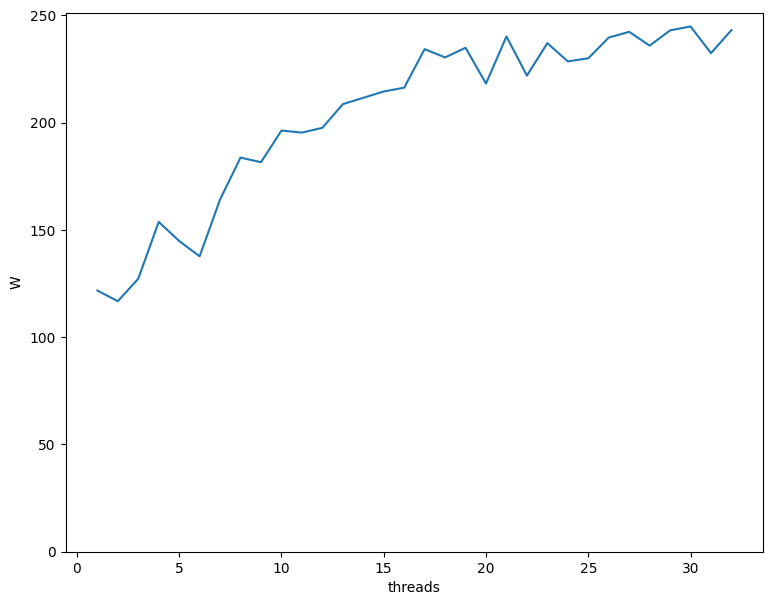

In [6]:
plt.figure(figsize=(9,7))
ax = sns.lineplot(df0, x='threads', y='W')
ax.set_ylim((0, None))
plt.show()

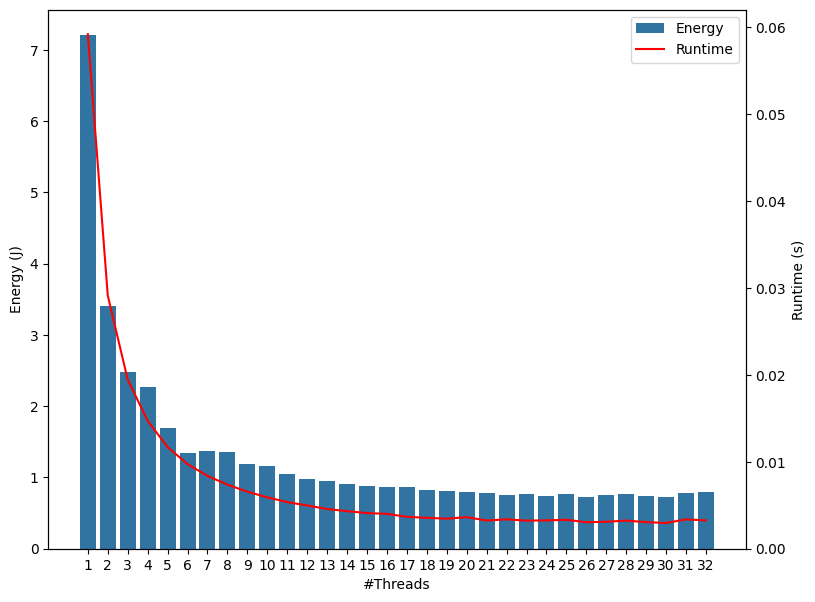

In [7]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df0, x=df0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy (J)')
ax2.set_ylabel('Runtime (s)')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

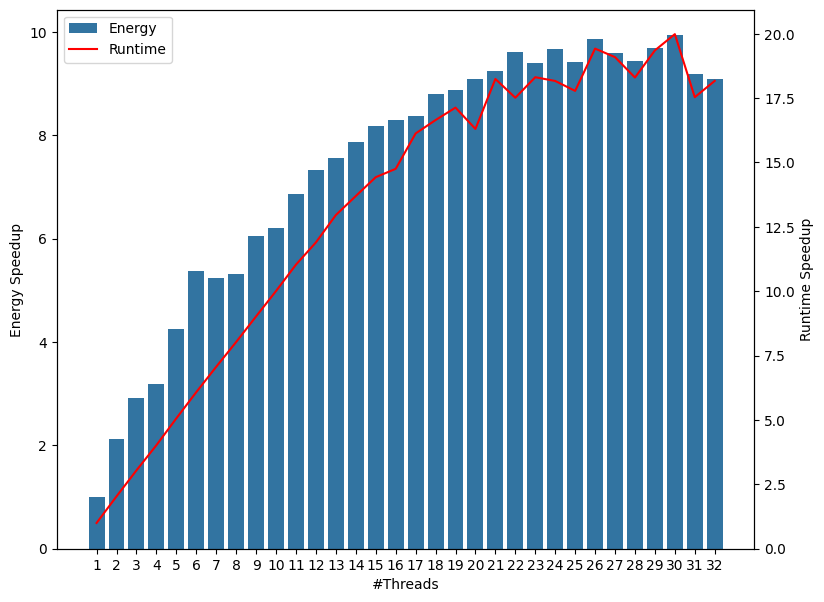

In [8]:
plt.figure(figsize=(9,7))

ax1 = sns.barplot(df_speedup0, x='threads', y='energy-user', label='Energy', legend=False)

ax2 = ax1.twinx()

sns.lineplot(df_speedup0, x=df_speedup0.index, y='usertime', label='Runtime', color='r', ax=ax2)

ax1.set_xlabel('#Threads')
ax1.set_ylabel('Energy Speedup')
ax2.set_ylabel('Runtime Speedup')
ax2.set_ylim((0, None))

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2)

plt.show()

# With busy threads

In [9]:
for (busy, df_busy) in df.groupby('busy'):
    best = df_busy[df_busy['energy'] == df_busy['energy'].min()].iloc[0]
    print(busy, '\t', int(best['threads']), '\t', best['energy'])

0 	 18 	 0.98246063
4 	 19 	 0.95090829
8 	 18 	 0.94792647
12 	 18 	 1.01120643
16 	 16 	 0.93696176
20 	 13 	 1.19005555
24 	 8 	 1.63054901
28 	 4 	 3.10047294
32 	 30 	 3.13703413


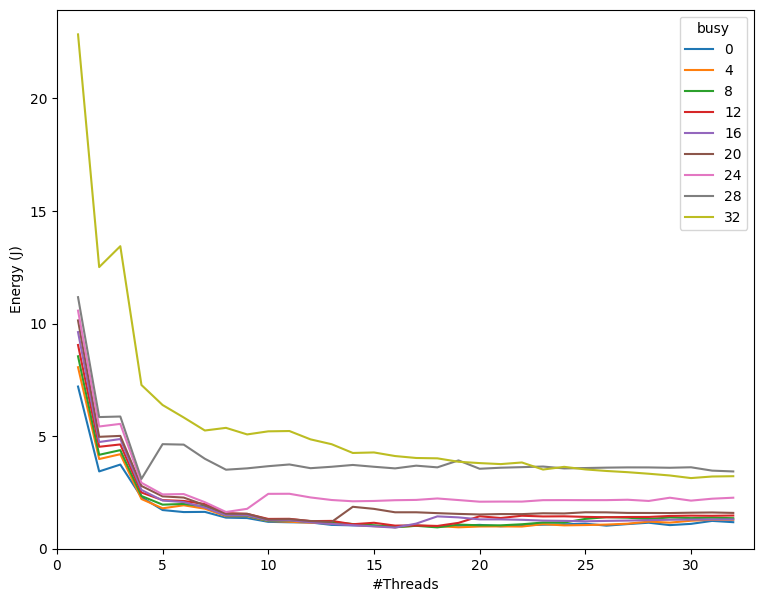

In [10]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='energy', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Energy (J)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()

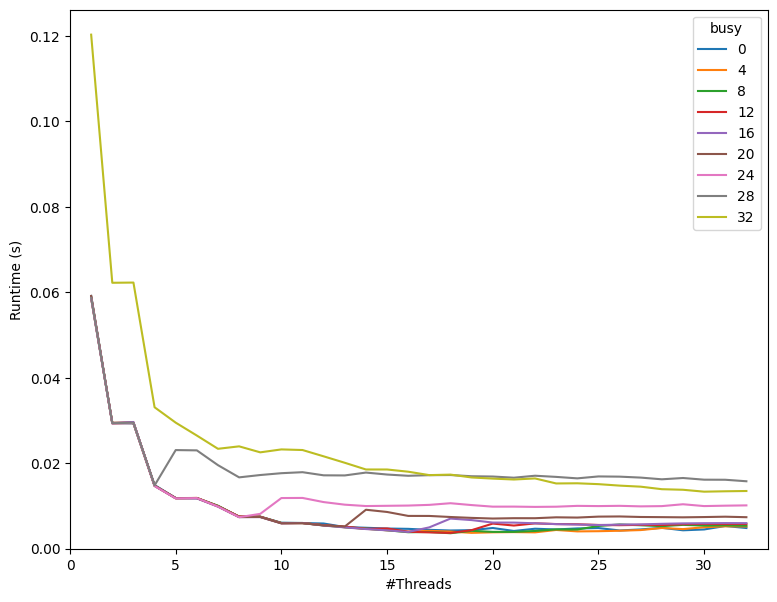

In [11]:
plt.figure(figsize=(9,7))

ax = sns.lineplot(df, x='threads', y='runtime', hue=df['busy'].astype('category'))

ax.set_xlabel('#Threads')
ax.set_ylabel('Runtime (s)')
ax.set_xlim((0, 33))
ax.set_ylim((0, None))

plt.show()